# Lecture 14: 2023-21-03 Logistic Regression Model

## Lecture overview

- Naive Bayes assignment due
- Project milestones check-in
- Logistic regression model

## Logistic regression model

Logistic regression (or logit regression) is a statistical model that in its basic form uses a logistic function to estimate the probability of a binary dependent variable and it's relationship to class membership. In this lecture, we will use analyse the sentiment of tweets and movie reviews using logistic regression.

Some important ideas we introduce in this lecture:

* Sigmoid function
* Weights and bias
* Gradient descent
* Cross-entropy loss function


## Overview of the supervised machine learning process

<img src="./images/super_ml.png" height="400" width="800">

Image credit: deeplearning.ai 

## The sigmoid function

The sigmoid function is a mathematical function that has a characteristic "S" shape. It is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$



### Sigmoid function in Python

We can implement the sigmoid function in Python as follows:

```python

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

```

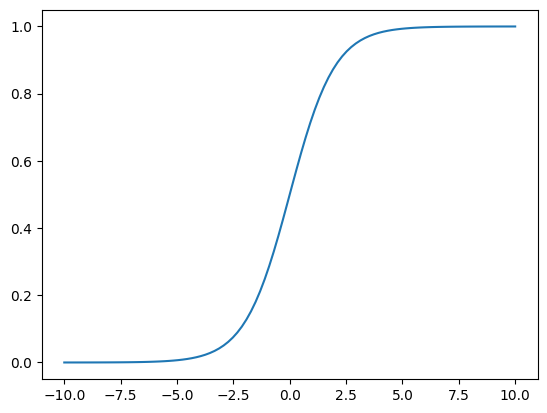

In [25]:
## code the sigmoid function
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

# plot the sigmoid function
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = sigmoid(x)

## plot the results
plt.plot(x,y)


### Overview of the sigmoid function in logistic regression

<img src="./images/lr.png" height="400" width="800">

Image credit: deeplearning.ai

### Summary of the sigmoid function

Regression:

$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$

The $\theta$ values are "weights". In our discussion of the perceptron, we described the the weights with the 'w' vector. For logistic regression, it is common to use the $\theta$ vector.

Logistic regression

$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$

We can consider `z` the 'logits'.

<img src="./images/Neuron.drawio.png">

## The Cost Function

For logistic regression, we can define the cost function as the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$

Where:

* $m$ is the number of training examples `len(x)`
* $y^{(i)}$ is the actual label of training example 'i'.
* $h(z^{(i)})$ is the model's prediction for the training example 'i'.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label 'y' is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

Ergo,

$$c(\theta) = -\log(\hat{p}) \text{ if } y = 1$$
$$c(\theta) = -\log(1-\hat{p}) \text{ if } y = 0$$

credit: deeplearning.ai

 ## How do we train a logistic regression model? Update weights with gradient descent

To train our model we need to update the weights $\theta$ using gradient descent. We can do this by calculating the gradient of the cost function with respect to the weights, and then updating the weights by subtracting a fraction of the gradient. As we interate through the training examples, we will update the weights to minimize the cost function and therefore improve the model's predictions.
 
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j \tag{5}$$

* `i` is the index across all `m` training examples.
* `j` is the index of the weight $\theta_j$, so $x^{(i)}_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, calculate the cost function using all training examples and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  

$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$

* $\mathbf{\theta}$ has dimensions ($n+1$, 1), where `n` is the number of features, and there is one more element for the bias term $\theta_0$.
* The logits, `z`, are calculated by multiplying the feature matrix `x` with the weight vector `theta`.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (`m, n+1`) 
    * $\mathbf{\theta}$: has dimensions (`n+1, 1`)
    * $\mathbf{z}$: has dimensions (`m, 1`)
* The prediction `h`, is calculated by applying the sigmoid to each element in `z`: $h(z) = sigmoid(z)$, and has dimensions (`m,1`).
* The cost function $J$ is calculated by taking the dot product of the vectors `y` and `log(h)`.  Since both `y` and `h` are column vectors (`m,1`), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.

$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$

* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:

$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

## Logistic Regression with Numpy

In [26]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

### Create a dataset

In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate a toy dataset
X, y = make_classification(n_samples=2000, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# create a LogisticRegression instance and fit the model to the training data
lr = LogisticRegression(lr=0.1, num_iter=100000, fit_intercept=True, verbose=True)
lr.fit(X_train, y_train)

# predict the probabilities and labels for the test data
y_pred_prob = lr.predict_prob(X_val)
y_pred = lr.predict(X_val)

# evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Loss: 0.6690072141937281 	
Loss: 0.25922632024131476 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Loss: 0.2592263202413148 	
Accuracy: 0.89
Precision: 0.905
Recall: 0.8786407766990292
F1 Score: 0.8916256157635468


In [29]:
## Let's look at our input data
X[:10]

array([[ 2.14248208, -0.23596999,  1.95144599,  0.74418571],
       [-0.77897812, -0.10325476, -0.74849981, -1.64318881],
       [-1.44599312,  0.570613  , -2.14448207,  0.96818466],
       [ 0.21118048,  0.27735846,  0.22342968, -0.02227898],
       [-0.75440546,  0.55229994,  1.04595911,  0.62563093],
       [-0.4535553 ,  0.48206673,  0.7631217 ,  0.36873315],
       [ 0.6392461 ,  0.44419833, -1.61208101,  1.10132296],
       [ 0.76611409, -0.62203481,  0.85561474,  0.58273758],
       [ 0.81488287, -0.70957985,  0.0594143 , -1.25850491],
       [-0.93239919,  1.06020991, -0.61378471,  2.75966004]])

In [30]:
## Let's look at our labels
y[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

Let's dig into our LogisticRegression class

```python

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr # alpha
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
```

We initialize our class with lr, num_iter, fit_intercept, and verbose. We'll use these to set the learning rate, number of iterations, whether or not we want to fit an intercept, and whether or not we want to print out the loss during training.

N.B.: The intercept term allows the logistic regression model to fit a decision boundary that doesn't necessarily pass through the origin. Without the intercept term, the decision boundary would always pass through the origin, which might not be appropriate for some datasets.

```python

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # returns h = sigmoid(z)

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

```

We have three helper functions. The first one adds a column of ones to the data to account for the intercept. The second one calculates the sigmoid function. The third one calculates the loss.

```python

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta) # dot product of X (training data) and theta
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size # calculate the gradient
            self.theta -= self.lr * gradient # update the weights theta

            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')

```

Our fit method takes in X and y, and if we want to fit an intercept, we add a column of ones to X. We initialize our weights to zero. Then we iterate through the number of iterations that we want to train. We calculate the logits, then the sigmoid, then the gradient, and then update the weights. We print out the loss if we desire to do so. Our loss should decrease as we train our model.

```python

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
```

Our predict_prob method takes in X and returns the probability that the data point belongs to the positive class. Since we know from the sigmoid function that the output is between 0 and 1, we can use a threshold of 0.5 to determine whether or not the data point belongs to the positive class. If the probability is greater than or equal to 0.5, we predict that the data point belongs to the positive class. Otherwise, we predict that the data point belongs to the negative class.

## Movie Review Sentiment Analysis

Now, let's use our LogisticRegression class to perform sentiment analysis on movie reviews. We'll use the IMDB dataset, which contains 50,000 movie reviews from the Internet Movie Database. Half of the reviews are positive, and half are negative. The dataset is split into 25,000 reviews for training and 25,000 reviews for testing.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import spacy

from tqdm.autonotebook import tqdm

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords



## html display
from IPython.display import display, HTML

2023-03-21 14:51:42.236812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 14:51:42.557377: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-21 14:51:43.433425: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-21 14:51:43.433506: W tensorflow/compiler/xla/stream_executor/platform/default/dso_lo

## Load the data

In [105]:
df = pd.read_csv('data/IMDB_Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [106]:
# let's convert the labels to 0 and 1
labels = {'positive': 1, 'negative': 0}

df['sentiment'] = df['sentiment'].map(labels)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


## Visualize the data

<AxesSubplot: xlabel='sentiment'>

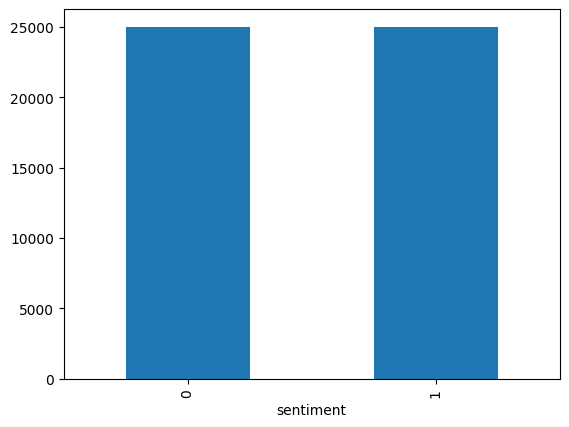

In [107]:
# let's plot the distribution of the labels
df.groupby('sentiment').count()['review'].plot(kind='bar')

## Extract features from the data

In [108]:
## Let's preprocess our data
NLP = spacy.load('en_core_web_sm')

def preprocess(text: str) -> str:
    """Preprocess by tokenizing text and remove stopwords"""
    # stopwords 
    stop_words = set(stopwords.words('english'))
    
    # tokenize the text with spacy
    doc = NLP(text)
    
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    return " ".join(tokens)
    

In [109]:
test = 'This movie was horrible, and I hated it. I found the plot to be very boring and the acting was terrible.'
test_res = preprocess(test)
test_res

'movie horrible i hate i find plot boring acting terrible'

In [111]:
## Let's preprocess our data
df_a = df[:500].copy()
df_a['review'] = df_a['review'].apply(preprocess)
df_a.head()

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,1
1,wonderful little production br film technique ...,1
2,i think wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


<AxesSubplot: ylabel='Frequency'>

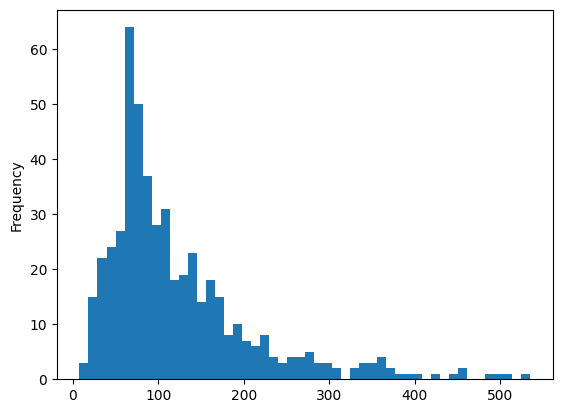

In [114]:
## let's see the distribution of token counts
df_a['token_count'] = df_a['review'].apply(lambda x: len(x.split()))
df_a['token_count'].plot(kind='hist', bins=50)

<AxesSubplot: xlabel='sentiment'>

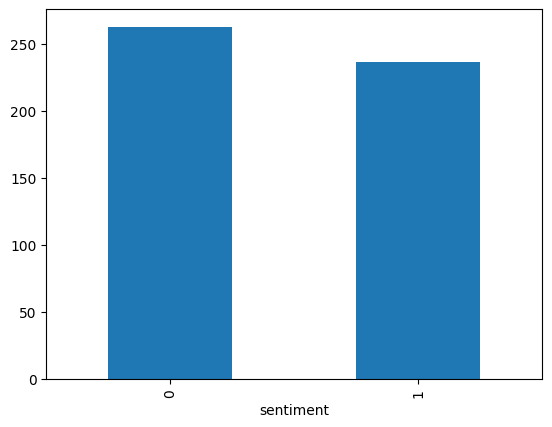

In [116]:
## Check the distribution of the labels
df_a.groupby('sentiment').count()['token_count'].plot(kind='bar')

In [125]:
## Let's convert our text to vectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# X = vectorizer.fit_transform(df_a['review']).toarray()
X = tfidf_vectorizer.fit_transform(df_a['review']).toarray()

y = df_a['sentiment'].values

In [126]:
## Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
## Check the shape of the data
len(X_train), len(X_val)

(400, 100)

In [128]:
lr = LogisticRegression(lr=0.01, num_iter=100000, fit_intercept=True, verbose=True)
lr.fit(X_train, y_train)

Loss: 0.6931183269710537 	
Loss: 0.6064129162421817 	
Loss: 0.5402145569455459 	
Loss: 0.48627886097868334 	
Loss: 0.4415164792037139 	
Loss: 0.40378674968323414 	
Loss: 0.37156941332311805 	
Loss: 0.34375587299548455 	
Loss: 0.3195177983935438 	
Loss: 0.29822293432578534 	


In [129]:
y_pred = lr.predict(X_val)

In [130]:
## Evaluate the model's performance

accuracy_score(y_val, y_pred)

0.81

<AxesSubplot: >

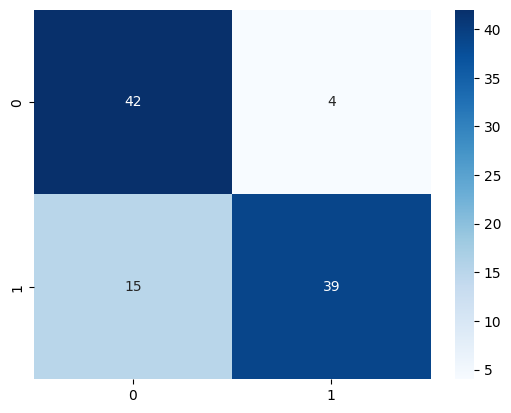

In [131]:
## Let's look at a confusion matrix

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_val, y_pred)

## Let's plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues')

In [132]:
## Let's look at the classification report

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        46
           1       0.91      0.72      0.80        54

    accuracy                           0.81       100
   macro avg       0.82      0.82      0.81       100
weighted avg       0.83      0.81      0.81       100



In [138]:
## Let's write a review and see if the model can predict the sentiment

pos_review = """
"Encino Man" is a comedy film released in 1992 that tells the story of two high school students,
Dave and Stoney, who discover a frozen caveman while digging a pool in Dave's backyard in Encino,
California. They thaw him out and attempt to integrate him into modern society, with hilarious
and often disastrous results. The movie features a young and charismatic cast, including Sean
Astin as Dave, Pauly Shore as Stoney, and Brendan Fraser as the titular "Encino Man" or Link as
he comes to be called. Brendan Fraser's performance as Link is a standout, as he perfectly
captures the physicality and expressive language of a caveman in a modern setting, while also
imbuing the character with a sense of innocence and charm that makes him endearing to the audience.
The humor in "Encino Man" is mostly of the slapstick and gross-out variety, with a lot of
physical comedy and exaggerated facial expressions from Pauly Shore. While some of the jokes
may not land with everyone, there are still plenty of laughs to be had, especially for fans of
early 90s comedy. The plot is relatively simple and predictable, with the main conflict revolving
around Dave's desire to fit in with the popular crowd and impress his crush, Robyn. However, the
movie's charm and humor more than make up for any shortcomings in the plot. Overall, "Encino Man"
is a fun and light-hearted comedy that delivers plenty of laughs and a memorable performance from
Brendan Fraser. While it may not be a cinematic masterpiece, it's definitely worth a watch for
fans of 90s nostalgia and goofy humor.

"""

p_rev = preprocess(pos_review)
p_rev

'encino man comedy film release tell story two high school student dave stoney discover frozen caveman dig pool dave backyard encino california thaw attempt integrate modern society hilarious often disastrous result movie feature young charismatic cast include sean astin dave pauly shore stoney brendan fraser titular encino man link come call brendan fraser performance link standout perfectly capture physicality expressive language caveman modern setting also imbue character sense innocence charm make endear audience humor encino man mostly slapstick gross variety lot physical comedy exaggerated facial expression pauly shore joke may land everyone still plenty laugh especially fan early comedy plot relatively simple predictable main conflict revolving around dave desire fit popular crowd impress crush robyn however movie charm humor make shortcoming plot overall encino man fun light hearted comedy deliver plenty laugh memorable performance brendan fraser may cinematic masterpiece defin

In [139]:
## predict the sentiment with our model
res = tfidf_vectorizer.transform([p_rev]).toarray()
'positive' if lr.predict(res) else 'negative'

'positive'

In [142]:
neg_review = """
"Encino Man" is a comedy film released in 1992 that tells the story of two high school students,
Dave and Stoney, who discover a frozen caveman while digging a pool in Dave's backyard in Encino,
California. While the premise may seem intriguing, the execution falls short and the film comes
across as a poorly-made attempt at slapstick comedy. The acting in the movie is lackluster at best,
with even talented actors like Sean Astin and Brendan Fraser delivering forgettable performances.
Pauly Shore's exaggerated facial expressions and over-the-top acting may have been entertaining for
some, but for others, it comes across as annoying and grating. The humor in "Encino Man" relies
heavily on juvenile and crude jokes that are not particularly clever or original. The constant gags
involving bodily functions and gross-out humor quickly become tiresome and predictable. The plot is
thin and cliched, revolving around Dave's desire to fit in with the popular crowd and impress his
crush, Robyn. The attempts to integrate the caveman into modern society are poorly executed, with
the characters' reactions to Link's behavior often coming across as forced and unrealistic.
Overall, "Encino Man" is a forgettable and poorly executed attempt at comedy that fails to deliver
any genuine laughs or entertainment. The juvenile humor, predictable plot, and lackluster acting
make for an overall disappointing viewing experience.
"""

n_rev = preprocess(neg_review)
n_rev

'encino man comedy film release tell story two high school student dave stoney discover frozen caveman dig pool dave backyard encino california premise may seem intriguing execution fall short film come across poorly make attempt slapstick comedy acting movie lackluster good even talented actor like sean astin brendan fraser deliver forgettable performance pauly shore exaggerated facial expression top acting may entertain come across annoying grating humor encino man rely heavily juvenile crude joke particularly clever original constant gag involve bodily function gross humor quickly become tiresome predictable plot thin cliched revolve around dave desire fit popular crowd impress crush robyn attempt integrate caveman modern society poorly execute character reaction link behavior often come across force unrealistic overall encino man forgettable poorly execute attempt comedy fail deliver genuine laugh entertainment juvenile humor predictable plot lackluster acting make overall disappoi

In [143]:
res = tfidf_vectorizer.transform([n_rev]).toarray()
'positive' if lr.predict(res) else 'negative'

'negative'